In [18]:
#loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools
import seaborn as sns

from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.ensemble import AdaBoostClassifier
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score,plot_roc_curve

In [2]:
# Uploading preprocessed data and dropping unnecessary column.
data = pd.read_csv('final_train.csv')
data.drop('Unnamed: 0',axis=1,inplace=True)
data.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,clean_comment
0,explanation why the edits made under my userna...,0,0,0,0,0,0,explanation edits made username hardcore metal...
1,d aww he matches this background colour i m se...,0,0,0,0,0,0,aww match background colour seemingly stuck th...
2,hey man i m really not trying to edit war it s...,0,0,0,0,0,0,hey man really trying edit war guy constantly ...
3,more i ca not make any real suggestions on im...,0,0,0,0,0,0,make real suggestion improvement wondered sect...
4,you sir are my hero any chance you remember wh...,0,0,0,0,0,0,sir hero chance remember page


In [3]:
# Checking null values.
data.isna().sum()

comment_text          0
malignant             0
highly_malignant      0
rude                  0
threat                0
abuse                 0
loathe                0
clean_comment       129
dtype: int64

In [4]:
# Removing all null values.
data.dropna(inplace = True)

In [5]:
# Vectorizing with TDIDF vectorizer.
tfidf = TfidfVectorizer()

feature1 = tfidf.fit_transform(data['clean_comment'])

#### TRAIN TEST SPLIT

In [6]:
# Assigning data for modelling.
X = feature1
y = data['malignant']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.3,
                                                   random_state = 42)

In [8]:
# Defining function to calculate losses.
def evaluate_score(y_test,y_pred): 
    loss = hamming_loss(y_test,y_pred)
    print("Hamming_loss : {}".format(loss*100))
    accuracy = accuracy_score(y_test,y_pred)
    print("Accuracy : {}".format(accuracy*100))
    try : 
        loss = log_loss(y_test,y_pred)
    except :
        loss = log_loss(y_test,y_pred.toarray())
    print("Log_loss : {}".format(loss))

### MODELLING

### 1.Multinomial Naive Bayes Classifier

**The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification).**

In [9]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [10]:
y_pred = model.predict(X_test)

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     43238
           1       0.99      0.18      0.30      4595

    accuracy                           0.92     47833
   macro avg       0.95      0.59      0.63     47833
weighted avg       0.93      0.92      0.89     47833



In [12]:
 evaluate_score(y_test, y_pred)

Hamming_loss : 7.9380344113896255
Accuracy : 92.06196558861038
Log_loss : 2.7417001226653186


### 2.Complement Naive Bayes Classifier

In [13]:
model2 = ComplementNB()
model2.fit(X_train, y_train)

ComplementNB()

In [14]:
y_preds = model2.predict(X_test)

In [15]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     43238
           1       0.71      0.47      0.57      4595

    accuracy                           0.93     47833
   macro avg       0.83      0.72      0.76     47833
weighted avg       0.92      0.93      0.92     47833



In [27]:
 evaluate_score(y_test, y_preds)

Hamming_loss : 6.909455815023101
Accuracy : 93.09054418497689
Log_loss : 2.3864559872086595


### 3. AdaBoost Classifier

In [23]:
model3 = AdaBoostClassifier(ComplementNB())
model3.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=ComplementNB())

In [24]:
y_pred_ada = model3.predict(X_test)

In [25]:
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     43238
           1       0.88      0.16      0.28      4595

    accuracy                           0.92     47833
   macro avg       0.90      0.58      0.62     47833
weighted avg       0.91      0.92      0.89     47833



In [26]:
 evaluate_score(y_test, y_pred_ada)

Hamming_loss : 8.247444233060857
Accuracy : 91.75255576693915
Log_loss : 2.8485679768793144


Ploting the **hamming-loss** and **log-loss** of different models, which we selected.

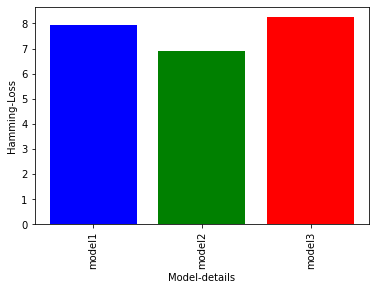

In [33]:
x = ['model1','model2','model3']
y = [7.93,6.90,8.24]
colors = itertools.cycle(['b', 'g', 'r'])
plt.ylabel('Hamming-Loss')
plt.xlabel('Model-details')
plt.xticks(rotation=90)
for i in range(len(y)):
    plt.bar(x[i], y[i], color=next(colors))
plt.show()

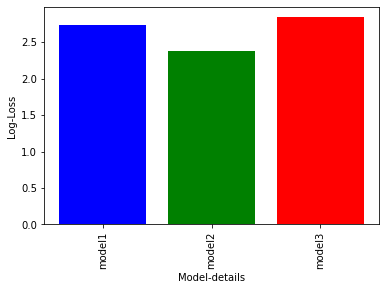

In [34]:
x = ['model1','model2','model3']
y = [2.74,2.38,2.84]
colors = itertools.cycle(['b', 'g', 'r'])
plt.ylabel('Log-Loss')
plt.xlabel('Model-details')
plt.xticks(rotation=90)
for i in range(len(y)):
    plt.bar(x[i], y[i], color=next(colors))
plt.show()

**If we compare all the models on basis of hamming-loss :**  
The best model would be Complement Naive Bias Classifier model. It has a hamming-loss of 6.90 % only.

**If we compare all the models on basis of Log-loss :**  
The best model will be the Complement Naive Bias Classifier model. It has a Log-loss of 2.38% only.

## SAVING BEST MODEL

In [28]:
import joblib
joblib.dump(model2, 'malginant-classification.pkl')

['malginant-classification.pkl']